In [ ]:
from google.colab import drive
drive.mount("content")

Mounted at content


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

In [ ]:
train=pd.read_csv("/content/content/MyDrive/model_line/model_line/low/train_low_line.csv",header=None)
test=pd.read_csv("/content/content/MyDrive/model_line/model_line/low/test_low_line.csv",header=None)
vali=pd.read_csv("/content/content/MyDrive/model_line/model_line/low/valid_low_line.csv",header=None)

In [ ]:
train.shape

(256, 60)

In [ ]:
arr = np.array([]) # arr안에 번호가 사람 번호

for i in range(1,101):
  for j in range(240):
    arr = np.append(arr, np.array([i]))

train[256]=arr

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.011566,0.077466,0.083038,0.015121,-0.024216,0.026618,0.112943,0.067018,-0.022367,0.035899,...,-0.080380,-0.088511,0.005901,-0.000657,-0.066214,-0.061900,-0.011674,0.064162,-0.020820,1.0
1,-0.105411,0.006199,0.035219,-0.038238,-0.087385,-0.047431,0.057264,0.011541,-0.063622,-0.054354,...,-0.102607,-0.121740,-0.038993,-0.017367,-0.083201,-0.108995,-0.055099,0.004076,-0.050829,1.0
2,-0.124635,-0.101820,-0.004986,-0.009573,-0.097080,-0.078287,-0.033934,0.011788,-0.100740,-0.105788,...,-0.087241,-0.110820,-0.037730,0.000719,-0.066072,-0.119163,-0.068725,0.003512,-0.040881,1.0
3,-0.070665,-0.110059,-0.041584,0.011091,-0.073945,-0.116371,-0.065348,0.005895,-0.075523,-0.138241,...,-0.074093,-0.113909,-0.113364,-0.053677,-0.015389,-0.088530,-0.122749,-0.019986,-0.033522,1.0
4,0.164484,0.137004,0.165505,0.176745,0.186086,0.149056,0.190527,0.256168,0.278809,0.242770,...,0.168813,0.158065,0.156737,0.236019,0.242662,0.237836,0.242839,0.272923,0.371568,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.047641,0.025272,0.001593,0.008873,-0.022388,-0.055809,-0.067971,-0.044163,-0.045987,-0.032190,...,-0.062754,0.002815,-0.032905,-0.016336,-0.045078,0.004621,-0.020431,0.005698,-0.048605,100.0
23996,-0.017653,0.005880,-0.008398,-0.053956,-0.045114,-0.050892,-0.014791,-0.025570,-0.044989,-0.027848,...,-0.017953,0.000676,0.008635,-0.010605,0.004606,0.032398,0.011841,-0.004365,0.032981,100.0
23997,0.020267,0.062224,-0.014968,0.012301,0.073691,0.025622,0.056645,0.040058,0.073452,0.061997,...,-0.057440,-0.065800,-0.044000,-0.082399,-0.083447,-0.065335,-0.088911,-0.080017,-0.076062,100.0
23998,-0.091136,-0.072359,-0.082491,-0.096773,-0.108624,-0.106044,-0.096813,-0.094621,-0.049099,-0.103425,...,-0.095215,-0.045811,-0.093347,-0.052513,-0.086620,-0.069087,-0.056044,-0.095822,-0.080069,100.0


In [ ]:
arr_t = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_t = np.append(arr_t, np.array([i]))

arr_v = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_v = np.append(arr_v, np.array([i]))

test[256]=arr_t
vali[256]=arr_v
vali

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,1.757857,1.761049,1.763568,1.765083,1.765388,1.764480,1.762595,1.760185,1.757859,1.756279,...,1.742644,1.741366,1.740599,1.740582,1.741420,1.743086,1.745437,1.748252,1.751255,1.0
1,1.544946,1.546049,1.547770,1.549887,1.552157,1.554327,1.556169,1.557550,1.558479,1.559129,...,1.553053,1.556314,1.560194,1.564465,1.568940,1.573478,1.577984,1.582383,1.586600,1.0
2,1.695559,1.697523,1.699848,1.702404,1.704980,1.707305,1.709099,1.710126,1.710271,1.709585,...,1.678932,1.678790,1.679747,1.681958,1.685344,1.689624,1.694374,1.699106,1.703341,1.0
3,1.775055,1.770967,1.765108,1.757903,1.750143,1.742942,1.737608,1.735426,1.737369,1.743771,...,1.681760,1.655004,1.641810,1.651567,1.692000,1.767089,1.875369,2.009146,2.154947,1.0
4,1.724734,1.725498,1.725171,1.724080,1.722647,1.721315,1.720477,1.720418,1.721269,1.722978,...,1.698035,1.696608,1.695459,1.694902,1.695130,1.696178,1.697926,1.700150,1.702592,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.528888,1.529840,1.528139,1.524104,1.518376,1.511774,1.505117,1.499054,1.493960,1.489913,...,1.550977,1.583197,1.605661,1.618126,1.622195,1.620631,1.616599,1.612957,1.611750,100.0
5996,1.515056,1.511174,1.509395,1.510004,1.512908,1.517656,1.523524,1.529653,1.535207,1.539537,...,1.693020,1.696392,1.698900,1.700400,1.700869,1.700424,1.699334,1.697991,1.696852,100.0
5997,1.565344,1.564102,1.561757,1.559405,1.558051,1.558382,1.560646,1.564660,1.569916,1.575756,...,1.535411,1.536617,1.537876,1.539222,1.540659,1.542157,1.543669,1.545152,1.546585,100.0
5998,1.597548,1.595698,1.594912,1.595167,1.596213,1.597637,1.598970,1.599797,1.599838,1.598980,...,1.617056,1.620175,1.621880,1.622224,1.621475,1.620038,1.618362,1.616840,1.615746,100.0


In [ ]:
arr

array([  1.,   1.,   1., ..., 100., 100., 100.])

In [ ]:
y_train = to_categorical(train[256])
y_test = to_categorical(test[256])
y_val = to_categorical(vali[256])
y_train[:241]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train.drop([256], axis=1, inplace=True)
test.drop([256], axis=1, inplace=True)
vali.drop([256], axis=1, inplace=True)
train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.697478,1.713703,1.728594,1.741144,1.750717,1.757105,1.760490,1.761353,1.760349,1.758191,...,1.733215,1.733012,1.733423,1.734708,1.736879,1.739700,1.742739,1.745491,1.747515,1.748556
1,1.748610,1.747925,1.746924,1.746097,1.745874,1.746535,1.748158,1.750626,1.753678,1.756978,...,1.692840,1.694451,1.696899,1.699745,1.702543,1.704941,1.706748,1.707952,1.708690,1.709187
2,1.709674,1.710317,1.711171,1.712183,1.713227,1.714166,1.714897,1.715389,1.715680,1.715858,...,1.719168,1.722441,1.724729,1.726115,1.726820,1.727122,1.727259,1.727362,1.727430,1.727353
3,1.726979,1.726187,1.724966,1.723451,1.721925,1.720776,1.720402,1.721109,1.723015,1.726001,...,1.739956,1.739826,1.739925,1.740406,1.741383,1.742927,1.745059,1.747751,1.750910,1.754365
4,1.889883,1.889929,1.891485,1.895719,1.903396,1.914786,1.929653,1.947339,1.966906,1.987309,...,1.902981,1.914361,1.928167,1.944398,1.962799,1.982890,2.004016,2.025433,2.046399,2.066255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1.664913,1.642295,1.622705,1.606331,1.593275,1.583516,1.576874,1.572981,1.571289,1.571116,...,1.608223,1.609903,1.611269,1.612058,1.612049,1.611103,1.609213,1.606538,1.603402,1.600248
23996,1.520984,1.516451,1.512894,1.510777,1.510324,1.511420,1.513570,1.515967,1.517666,1.517848,...,1.614899,1.613789,1.614391,1.617356,1.622495,1.629054,1.636056,1.642622,1.648187,1.652595
23997,1.656066,1.659062,1.662113,1.665637,1.669814,1.674541,1.679471,1.684122,1.688029,1.690891,...,1.606590,1.600670,1.597018,1.594806,1.593269,1.591762,1.589812,1.587139,1.583680,1.579595
23998,1.575260,1.571225,1.568130,1.566590,1.567050,1.569659,1.574187,1.580032,1.586320,1.592084,...,1.578363,1.579022,1.578733,1.577374,1.575056,1.572128,1.569131,1.566724,1.565555,1.566133


In [ ]:
X_train=train.values
X_test=test.values
X_val=vali.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [ ]:
# X_train = X_train.reshape(1, 256, 24000)
# X_test = X_test.reshape(1, 256, 6000)
# X_val = X_val.reshape(1, 256, 6000)
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(256,1))) #shape[1]=열
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 256, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 256, 50)           30200     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dropout (Dropout)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 101)               1292901   
                                                                 
Total params: 1,444,301
Trainable params: 1,444,301
Non-

In [ ]:
print(X_train.shape)
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

(24000, 256, 1)
Epoch 1/500
24/24 [==============================] - 16s 250ms/step - loss: 0.0098 - accuracy: 0.0090 - val_loss: 0.0098 - val_accuracy: 0.0102
Epoch 2/500
24/24 [==============================] - 4s 175ms/step - loss: 0.0098 - accuracy: 0.0108 - val_loss: 0.0098 - val_accuracy: 0.0102
Epoch 3/500
24/24 [==============================] - 4s 176ms/step - loss: 0.0098 - accuracy: 0.0090 - val_loss: 0.0098 - val_accuracy: 0.0100
Epoch 4/500
24/24 [==============================] - 4s 176ms/step - loss: 0.0098 - accuracy: 0.0108 - val_loss: 0.0098 - val_accuracy: 0.0095
Epoch 5/500
24/24 [==============================] - 4s 176ms/step - loss: 0.0098 - accuracy: 0.0113 - val_loss: 0.0098 - val_accuracy: 0.0098
Epoch 6/500
24/24 [==============================] - 4s 177ms/step - loss: 0.0098 - accuracy: 0.0110 - val_loss: 0.0098 - val_accuracy: 0.0105
Epoch 7/500
24/24 [==============================] - 4s 186ms/step - loss: 0.0098 - accuracy: 0.0128 - val_loss: 0.0098 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


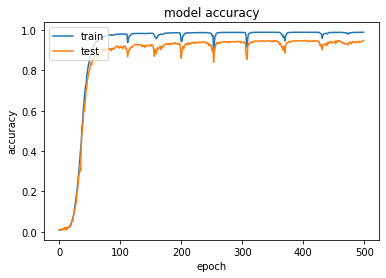

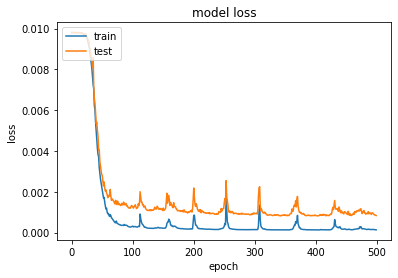

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
results = history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 


In [ ]:
model.save('SupervisedLstm(low).h5')